In [11]:
from os import listdir
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# data_folder
data_folder = '../data'

In [13]:
def merge_data(folder):
    """
    
    """
    
    # create empty dataframe
    df = pd.DataFrame()
    
    # get list of csvs
    file_paths = [file for file in listdir(folder)]
    
    for csv in file_paths:
        data = pd.read_csv(csv)       
        df = df.append(data)
    
    return df

# df = merge_data(data_folder)

In [14]:
# print(df.shape)
# df.head()

In [15]:
# generate random sample to work with for iteration
# comment out when working with full dataset
# df = df.sample(frac=0.001)
# print(df.shape)

In [16]:
# export to csv
# df.to_csv('sample.csv')

In [17]:
# High level overview
df = pd.read_csv('./data/sample.csv')
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.923600e+04,29236.000000,29236.000000,29236.000000,29236.000000,29236.000000,29236.000000,29236.000000,29236.000000,29236.000000,29236.000000,29236.000000,29236.000000,29236.000000,29236.000000
mean,4.904157e+06,1.541353,1.630079,2.948478,1.046963,162.796039,161.183985,1.327781,20.590054,0.331765,0.497076,1.888916,0.336562,0.299631,23.947714
std,2.827852e+06,0.498296,1.270581,3.805084,0.648808,66.422180,70.240761,0.490577,1276.788654,0.446842,0.041355,2.739267,1.501415,0.014249,1276.801655
min,2.700000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-52.000000,-1.000000,-0.500000,-1.140000,0.000000,-0.300000,-52.800000
25%,2.463455e+06,1.000000,1.000000,0.980000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,4.911608e+06,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000
75%,7.333432e+06,2.000000,2.000000,3.012500,1.000000,233.000000,233.000000,2.000000,15.000000,0.500000,0.500000,2.460000,0.000000,0.300000,17.850000
max,1.029388e+07,2.000000,6.000000,72.680000,99.000000,265.000000,265.000000,4.000000,218316.300000,4.500000,0.500000,115.000000,25.000000,0.300000,218317.090000


In [18]:
# remove negative values columns where it is not possible to have negative values
cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']
for col in cols:
    df = df[df[col] >= 0]
    
# remove zero values from where it is not possible to have zero values
cols = ['fare_amount', 'total_amount']
for col in cols:
    df = df[df[col] > 0]

df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.920800e+04,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000,29208.00000,29208.000000,29208.000000,29208.000000,29208.000000,29208.000000
mean,4.903957e+06,1.541290,1.630101,2.948208,1.045467,162.784374,161.148898,1.326315,20.613302,0.33222,0.497809,1.886418,0.336498,0.299969,23.969929
std,2.827689e+06,0.498301,1.270696,3.799906,0.644543,66.428201,70.245374,0.487699,1277.400265,0.44674,0.033028,2.658167,1.501457,0.003040,1277.413085
min,2.700000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.010000,0.00000,0.000000,0.000000,0.000000,0.000000,0.310000
25%,2.462941e+06,1.000000,1.000000,0.980000,1.000000,114.000000,112.000000,1.000000,6.500000,0.00000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,4.911608e+06,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.500000,0.00000,0.500000,1.400000,0.000000,0.300000,11.800000
75%,7.333432e+06,2.000000,2.000000,3.020000,1.000000,233.000000,233.000000,2.000000,15.000000,0.50000,0.500000,2.460000,0.000000,0.300000,17.850000
max,1.029388e+07,2.000000,6.000000,72.680000,99.000000,265.000000,265.000000,4.000000,218316.300000,4.50000,0.500000,100.300000,25.000000,0.300000,218317.090000


### Missing Values
There are no missing values. 

In [19]:
# list of variables with missing values
missing_vals = [var for var in df.columns if df[var].isnull().sum()>1]

for var in missing_vals:
    print(f'var, {np.round(df[var].isnull())} % missing values')

### Numerical Values

In [20]:
# list of variables with numerical values
num_vars = [var for var in df.columns if df[var].dtypes != 'O']

print("Num of numerical variables: ", len(num_vars))

df[num_vars].head()

Num of numerical variables:  15


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2466149,2,2,2.03,1,140,236,1,9.0,0.0,0.5,1.96,0.0,0.3,11.76
1,3406713,1,1,0.40,1,43,142,1,4.5,0.0,0.5,1.05,0.0,0.3,6.35
2,7071298,2,3,1.04,1,151,238,1,6.5,1.0,0.5,0.00,0.0,0.3,8.30
3,3845741,2,1,1.79,1,239,236,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30
4,3672997,1,1,1.20,1,246,246,1,6.0,0.5,0.5,2.15,0.0,0.3,9.45


In [21]:
len(df['PULocationID'].unique())

150

In [22]:
print(f'Number of PULocationIDs: {len(df.PULocationID.unique())}')
print(f'Number of DOLocationID: {len(df.DOLocationID.unique())}')

Number of PULocationIDs: 150
Number of DOLocationID: 223


In [23]:
# deal with time variable which is a string object: tpep_pickup_datetime
def string_to_datetime(df, var):
    """
    Converts string representation of date into datetime.
    Splits datetime into separate columns.
    """
    df = df.copy()
    
    df['time'] = pd.to_datetime(df[var])
   
    df['day'] = df['time'].dt.day
    df['month'] = df['time'].dt.month
    df['year'] = df['time'].dt.year
    df['hour'] = df['time'].dt.hour
    df['minute'] = df['time'].dt.minute
    df['second'] = df['time'].dt.second
    
    df = df.drop(columns=['time', var])

    return df

df = string_to_datetime(df, 'tpep_pickup_datetime')

In [24]:
df.head()

,Unnamed: 0,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,day,month,year,hour,minute,second
0,2466149,2,2017-03-06 12:20:21,2,2.03,1,N,140,236,1,...,1.96,0.0,0.3,11.76,6,3,2017,12,10,8
1,3406713,1,2017-06-14 08:14:38,1,0.40,1,N,43,142,1,...,1.05,0.0,0.3,6.35,14,6,2017,8,11,30
2,7071298,2,2017-11-22 19:49:49,3,1.04,1,N,151,238,1,...,0.00,0.0,0.3,8.30,22,11,2017,19,42,47
3,3845741,2,2017-11-12 17:09:24,1,1.79,1,N,239,236,2,...,0.00,0.0,0.3,10.30,12,11,2017,16,58,55
4,3672997,1,2017-06-14 22:06:32,1,1.20,1,N,246,246,1,...,2.15,0.0,0.3,9.45,14,6,2017,22,1,39


In [25]:
df.columns
time_vars = df.columns[-6:].values.tolist()
time_vars

['day', 'month', 'year', 'hour', 'minute', 'second']

Explore relationship between time variables and tip

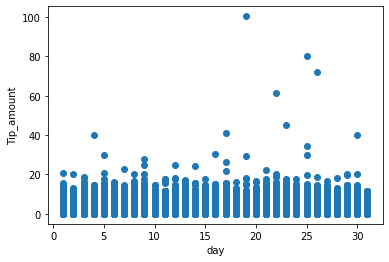

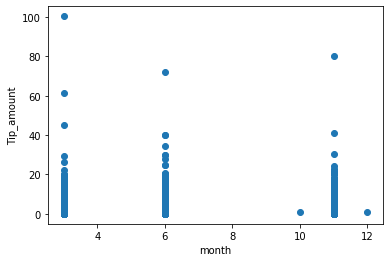

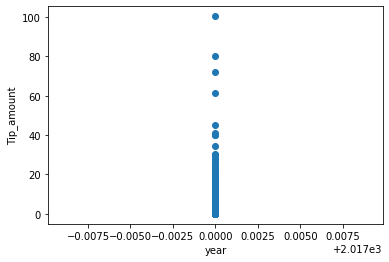

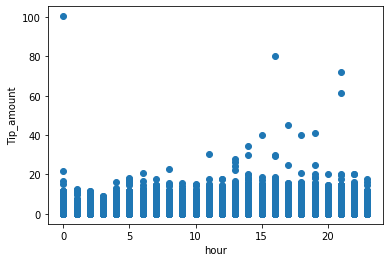

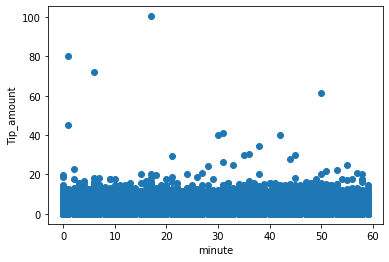

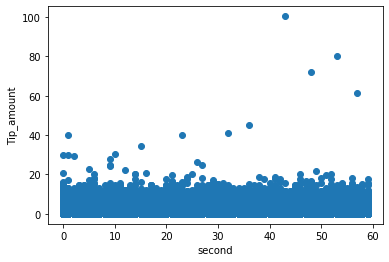

In [26]:
def analyze_time_var(df, var):
    """
    Plots time variable against target, tip amount.
    """
    df = df.copy()
    
    plt.scatter(df[var], df['tip_amount'])
    plt.ylabel('Tip_amount')
    plt.xlabel(var)
    plt.show()

time_vars = df.columns[-6:].values.tolist()
    
for var in time_vars:
    analyze_time_var(df, var)

#### Discrete Variables

In [29]:
# picked 20 as an arbitrary cutoff
discrete_vars = [var for var in num_vars if len(df[var].unique())<20 and var not in time_vars]
print(f'Number of discrete variables: ', len(discrete_vars))

df[discrete_vars].head()

Number of discrete variables:  7


,VendorID,passenger_count,RatecodeID,payment_type,extra,mta_tax,improvement_surcharge
0,2,2,1,1,0.0,0.5,0.3
1,1,1,1,1,0.0,0.5,0.3
2,2,3,1,1,1.0,0.5,0.3
3,2,1,1,2,0.0,0.5,0.3
4,1,1,1,1,0.5,0.5,0.3


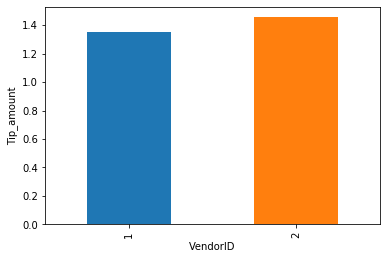

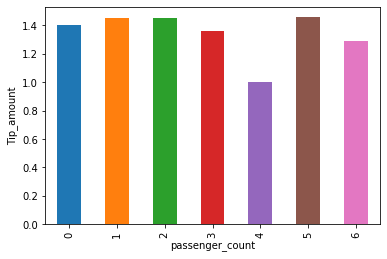

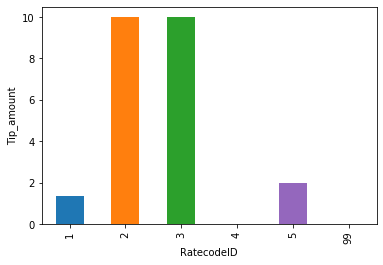

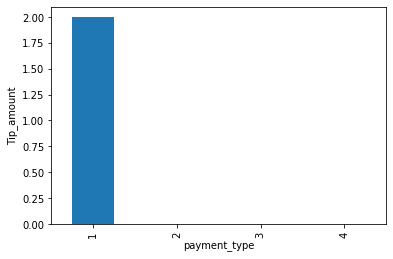

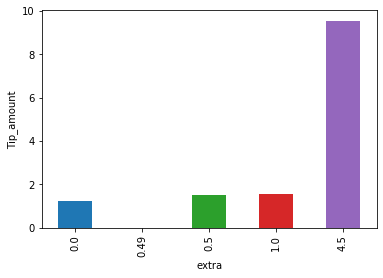

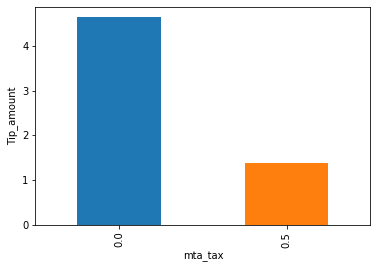

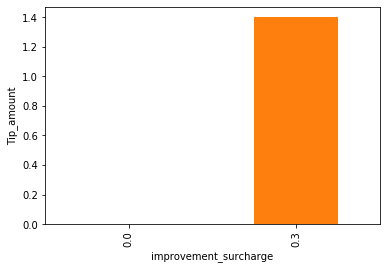

In [30]:
def analyze_discrete_var(df, var):
    """
    Plots discrete variable against target, tip amount.
    """
    df = df.copy()
    
    df.groupby(var)['tip_amount'].median().plot.bar()
    plt.ylabel('Tip_amount')
    plt.xlabel(var)
    plt.show()
    
for var in discrete_vars:
    analyze_discrete_var(df, var)

#### Continuous variables

In [31]:
cont_vars = [var for var in num_vars if var not in discrete_vars + time_vars]

print(f'Number of continous variables: ', len(cont_vars))

df[cont_vars].head()

Number of continous variables:  8


,Unnamed: 0,trip_distance,PULocationID,DOLocationID,fare_amount,tip_amount,tolls_amount,total_amount
0,2466149,2.03,140,236,9.0,1.96,0.0,11.76
1,3406713,0.40,43,142,4.5,1.05,0.0,6.35
2,7071298,1.04,151,238,6.5,0.00,0.0,8.30
3,3845741,1.79,239,236,9.5,0.00,0.0,10.30
4,3672997,1.20,246,246,6.0,2.15,0.0,9.45


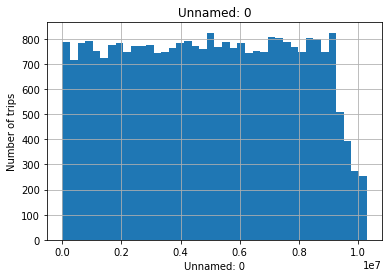

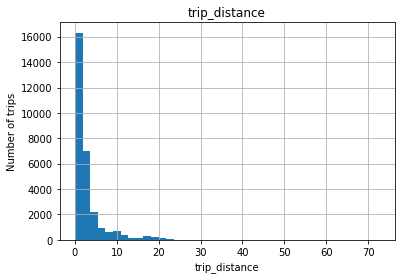

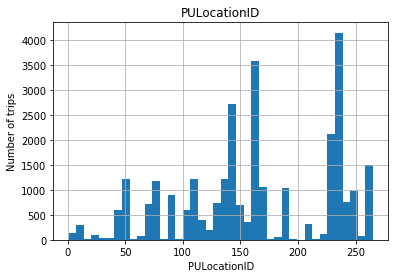

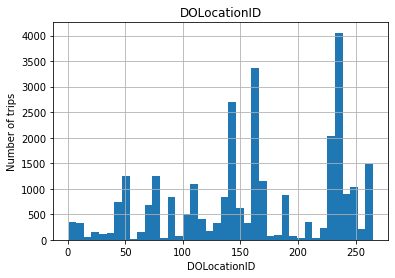

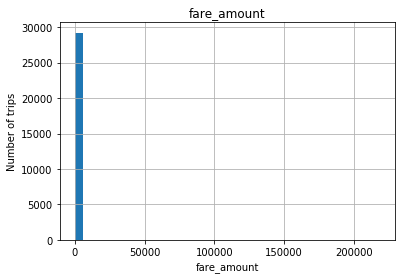

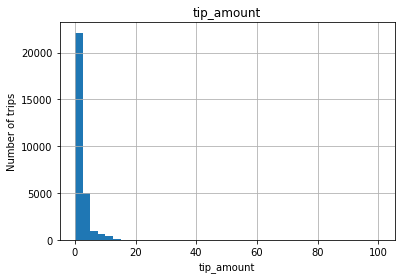

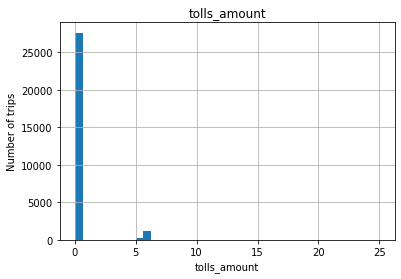

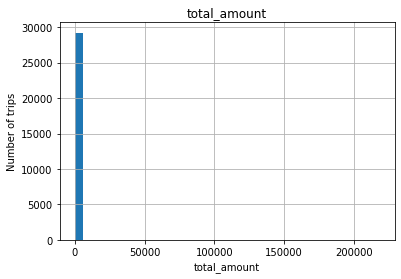

In [32]:
def hist_continuous_var(df, var):
    """
    Plots continuous variable against target, tip amount.
    Histogram shows skew or normal dist. 
    """
    df = df.copy()
    
    df[var].hist(bins=40)
    plt.title(var)
    plt.ylabel('Number of trips')
    plt.xlabel(var)
    plt.show()
    
for var in cont_vars:
    hist_continuous_var(df, var)

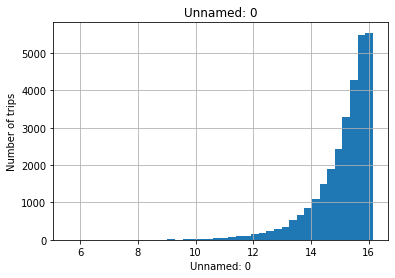

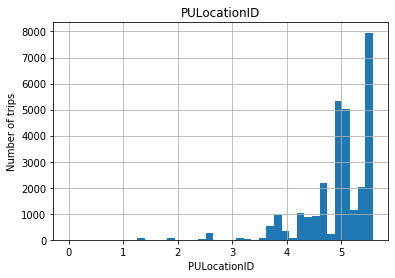

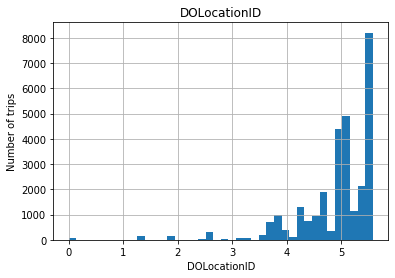

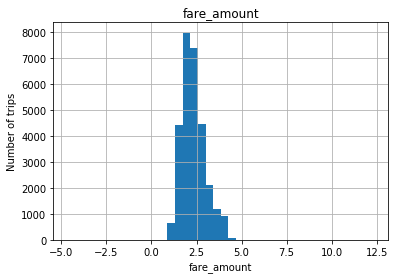

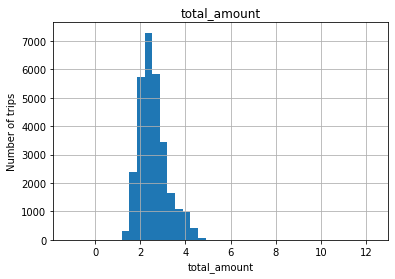

In [34]:
# log transform the cont variables to be more Gaussian
def hist_transformed_continuous_vars(df, var):
    """
    Log transform variables.
    Returns a histogram of log variables. 
    """
    df = df.copy()
    # skip variables with negative values
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        
        df[var].hist(bins=40)
        plt.title(var)
        plt.ylabel('Number of trips')
        plt.xlabel(var)
        plt.show()

for var in cont_vars:
    hist_transformed_continuous_vars(df, var)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


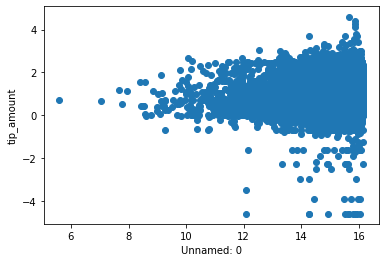

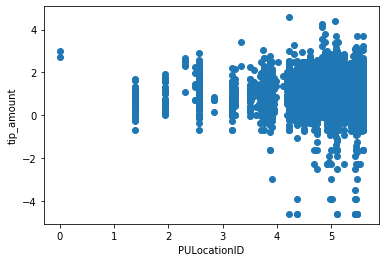

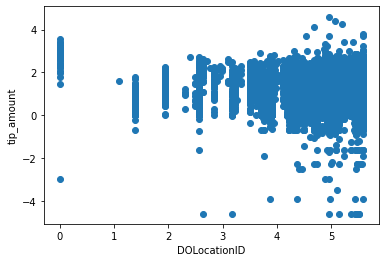

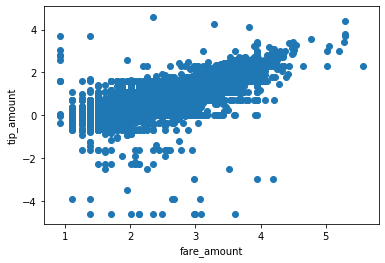

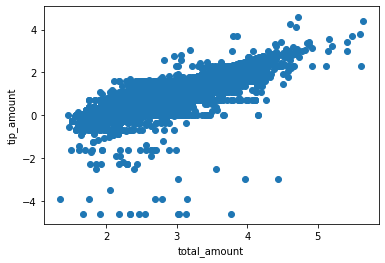

In [35]:
# explore relationship between target, tip_amount, and the transformed variables

def plot_transformed(df, var):
    df = df.copy()
    
    # skip variables with negative values
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df['tip_amount'] = np.log(df['tip_amount'])
        
        plt.scatter(df[var], df['tip_amount'])      
        plt.ylabel('tip_amount')
        plt.xlabel(var)
        plt.show()

for var in cont_vars:
    if var != 'tip_amount':
        plot_transformed(df, var)

#### Outliers

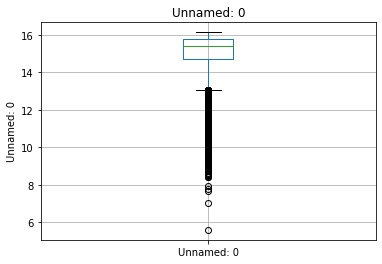

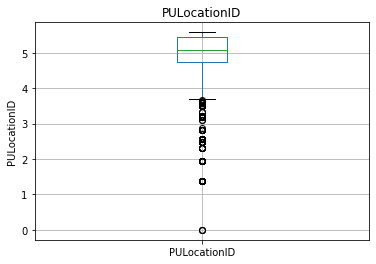

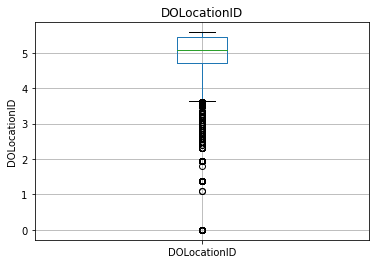

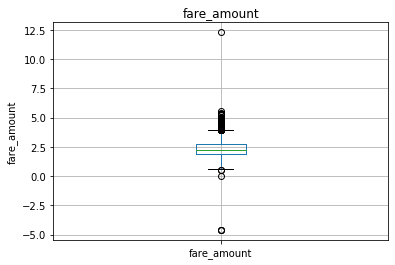

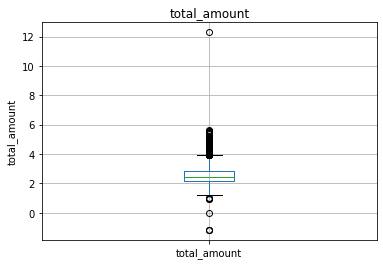

In [38]:
def plot_outliers(df, var):
    df = df.copy()
    
    # skip variables with negative values
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        
        df.boxplot(column=var)
        plt.title(var)
        plt.ylabel(var)
        plt.show()

for var in cont_vars:
    plot_outliers(df, var)

### Categorical variables
- nothing much

In [41]:
cat_vars = [var for var in df.columns if df[var].dtypes == 'O']
print('Number of categorical variables: ', len(cat_vars))

df[cat_vars].head()

Number of categorical variables:  2


,tpep_dropoff_datetime,store_and_fwd_flag
0,2017-03-06 12:20:21,N
1,2017-06-14 08:14:38,N
2,2017-11-22 19:49:49,N
3,2017-11-12 17:09:24,N
4,2017-06-14 22:06:32,N
